# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    # YOUR CODE HERE
    answer1 = numpy.cos(x)
    print(answer1)
    return answer1

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

0.8775825618903728


Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

[0.99500417 0.98006658 0.95533649 0.92106099 0.87758256 0.82533561]


Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    # YOUR CODE HERE
    answer2 = numpy.negative(numpy.sin(x))
    print(answer2)
    return answer2

In [7]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

-0.479425538604203


In [8]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

[-0.09983342 -0.19866933 -0.29552021 -0.38941834 -0.47942554 -0.56464247]


Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [9]:
def backward_difference(f, x, dx):
    answer3 = (f(x)-f(x-dx))/dx
    print(answer3)
    return answer3

backward_difference(f, 0.1, 0.0001)

0.9950041652780258
0.995014143644653
-0.09978366627194646


-0.09978366627194646

In [10]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

0.9950041652780258
0.995014143644653
-0.09978366627194646


**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


[ 1.          0.99195481  0.9679487   0.92836793  0.87384938  0.80527026
  0.72373404  0.63055267  0.52722547  0.41541501  0.29692038  0.17364818
  0.04758192 -0.07924996 -0.20480667 -0.32706796 -0.44406661 -0.55392006
 -0.65486073 -0.74526445 -0.82367658 -0.88883545 -0.93969262 -0.97542979
 -0.99547192 -0.99949654 -0.98743889 -0.95949297 -0.91610846 -0.85798341
 -0.78605309 -0.70147489 -0.60560969 -0.5        -0.38634513 -0.26647381
 -0.14231484 -0.01586596  0.1108382   0.23575894  0.35688622  0.47227107
  0.58005691  0.67850941  0.76604444  0.84125353  0.90292654  0.95007112
  0.9819287   0.99798668  0.99798668  0.9819287   0.95007112  0.90292654
  0.84125353  0.76604444  0.67850941  0.58005691  0.47227107  0.35688622
  0.23575894  0.1108382  -0.01586596 -0.14231484 -0.26647381 -0.38634513
 -0.5        -0.60560969 -0.70147489 -0.78605309 -0.85798341 -0.91610846
 -0.95949297 -0.98743889 -0.99949654 -0.99547192 -0.97542979 -0.93969262
 -0.88883545 -0.82367658 -0.74526445 -0.65486073 -0

Text(0.5,1,'A Plot to Represent the Difference Between the Analytical Derivative and the Numerical Implementation')

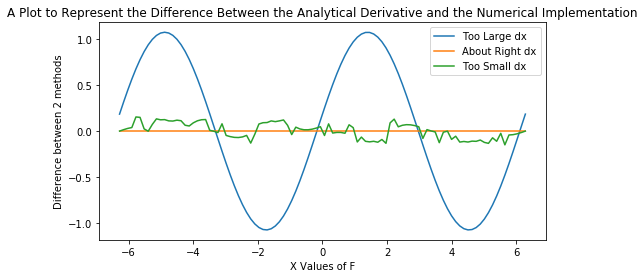

In [14]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_tooLarge = backward_difference(f, xs, dx=10)
df_dx_aboutRight = backward_difference(f, xs, dx=1e-8)
df_dx_tooSmall = backward_difference(f, xs, dx=1e-15)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.xlabel("X Values of F")
plt.ylabel("Difference between 2 methods")
plt.plot(xs, df_dx_tooLarge - df_dx_analytical, label='Too Large dx')
plt.plot(xs, df_dx_aboutRight - df_dx_analytical, label='About Right dx')
plt.plot(xs, df_dx_tooSmall - df_dx_analytical, label='Too Small dx')
plt.legend(loc='upper right')
plt.title('A Plot to Represent the Difference Between the Analytical Derivative and the Numerical Implementation')

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too small, if we look at the backward difference formula, the numerator will just be f(x)-f(x) as the dx value in the f(x-dx) becomes neglible and therefore the answer will be just zero which is wrong. Furthermore, the error is proportional to dx (looking at the backward difference formula) so when dx gets larger, the numerical implementation hields a higher error. 